In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# 1. Работа с массивами NumPy

**N. Все упражнения ниже нужно делать без использования циклов Python**

**1.** Cоздать вектор

$$(2, \frac{2^2}{2}, \ldots, \frac{2^{20}}{20})$$

Можно использовать функции [np.arange()](http://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html), [np.ones()](http://docs.scipy.org/doc/numpy/reference/generated/numpy.ones.html)

In [3]:
(2 * np.ones(20)) ** np.arange(1, 21) / np.arange(1, 21)

array([2.00000000e+00, 2.00000000e+00, 2.66666667e+00, 4.00000000e+00,
       6.40000000e+00, 1.06666667e+01, 1.82857143e+01, 3.20000000e+01,
       5.68888889e+01, 1.02400000e+02, 1.86181818e+02, 3.41333333e+02,
       6.30153846e+02, 1.17028571e+03, 2.18453333e+03, 4.09600000e+03,
       7.71011765e+03, 1.45635556e+04, 2.75941053e+04, 5.24288000e+04])

**2.** Посчитать:

$$\sum\limits_{i=0}^{5}{0.1^{3i}0.2^{4i}}$$


In [4]:
print(np.fromfunction(lambda i, j: (0.1 ** (3*i)) * 0.2 ** (4*i) , (5,1), dtype=int).sum())

1.00000160000256


**3.** Создать нулевую матрицe $8 \times 8$, и заполнить её единицами в шахматном порядке.

In [5]:
a,a[1::2,::2],a[::2,1::2] = np.zeros((8,8)), 1, 1
a

array([[0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0.]])

**4.** Есть 5 точек в декартовой системе координат (в виде матрицы $X$ размерностью $5 \times 2$), сконвертируйте эти точки в полярную систему координат.

In [6]:
a = np.random.random((5, 2))
x,y  = a[::,0],a[::,1]
print(np.concatenate((np.sqrt(x**2 + y**2).reshape(-1,1),np.arctan(y/x).reshape(-1,1)),axis=1))

[[1.11763274 0.80984395]
 [0.35894008 1.53715182]
 [1.01509652 1.32615887]
 [0.35885701 0.94925202]
 [1.0494232  1.16055779]]


**5.** Найдите индексы максимального элемента в случайной матрице $10 \times 10$.

Cм. [np.argmax()](http://docs.scipy.org/doc/numpy/reference/generated/numpy.argmax.html).

In [21]:
x = np.random.random((10, 10))
idx = np.unravel_index(np.argmax(x), x.shape); idx


(1, 2)

**6.** Есть 10 точек ($X$) и ещё одна ($y$). Найти в $X$ ближайшую к $y$ точку.

In [6]:
X = np.random.random((10, 2))
y = np.random.random((1, 2))
print('X =', X)
print('y =',y)
print('ближайшая точка =', X[np.argmin(np.sqrt( (X[:,0] - y[0,0]) ** 2 + (X[:,1] - y[0,1]) ** 2 ))])

X = [[0.89758396 0.30013831]
 [0.5488729  0.91277821]
 [0.54792444 0.70530227]
 [0.30457916 0.92860116]
 [0.81234982 0.78632803]
 [0.01821651 0.95814437]
 [0.61675341 0.31133284]
 [0.50220339 0.33955935]
 [0.4592978  0.80157706]
 [0.08561468 0.65422423]]
y = [[0.09526644 0.63666478]]
ближайшая точка = [0.08561468 0.65422423]


**7.** Дана функция:

$$
 \begin{cases}
    x^2 + 2x + 6, & x < 0  \\
    x + 6, & 0 \le x \le 2 \\
    x^2 + 4x - 4, & x \ge 2
 \end{cases}
$$

Постройте массив из её значений на  $-3 \le x \le 3$.

In [8]:
a = np.arange(-3,4,dtype=int)
print(a)
def my_func(a):
    if a < 0:
        return a ** 2 + 2 * a + 6
    elif a >= 0 and a <= 2:
        return a + 6
    elif a > 2:
        return a ** 2 + 4 * a - 4
vfunc = np.vectorize(my_func)
print(vfunc(a))

[-3 -2 -1  0  1  2  3]
[ 9  6  5  6  7  8 17]


**8.** Из каждого элемента матрицы вычесть среднее арифметическое от всех элементов в соответствующей строке (после чего среднее значение каждой строки должно равняться нулю).

Cм. [np.mean()](http://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html).

In [9]:
X = np.random.random((10, 10))
b = X.T - np.mean(X,axis=1).T
print(np.mean(b.T,axis=1))


[-7.77156117e-17 -3.33066907e-17  4.44089210e-17 -1.11022302e-17
  9.99200722e-17 -4.44089210e-17 -1.11022302e-17  1.11022302e-17
 -3.33066907e-17 -6.66133815e-17]


**9.** Есть массив из 1000 чисел, полученных из генератора случайных чисел, имеющий нормальное распределение. Посчитайте выборочное среднее и выборочную дисперсию. 

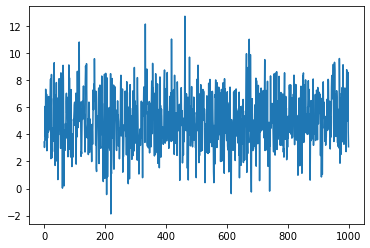

5.0025602025705584 3.9352078673783524


In [28]:
x = np.random.normal(loc=5, scale=2., size=1000)
plt.plot(np.arange(0,1000),x)
plt.show()
sample_mean = x.sum()/1000
sample_variance = (x ** 2).sum()/1000 - sample_mean ** 2
print(sample_mean,sample_variance)

**10.** Создать матрицу:

$$
\begin{pmatrix}
0 & 1 & 2 & 3 & 4 \\
1 & 2 & 3 & 4 & 0 \\
2 & 3 & 4 & 0 & 1 \\
3 & 4 & 0 & 1 & 2 \\
4 & 0 & 1 & 2 & 3
\end{pmatrix}
$$

In [29]:
a = np.ones((5, 5), dtype=np.int8) * np.arange(5)
a += a.T
a %= 5
a

array([[0, 1, 2, 3, 4],
       [1, 2, 3, 4, 0],
       [2, 3, 4, 0, 1],
       [3, 4, 0, 1, 2],
       [4, 0, 1, 2, 3]])

**11.** Есть следующий алгоритм семплинирования, на вход функции подается вектор из целых положительных чисел и число семплов.

In [12]:
def sample(x, c):
    assert len(x) > 0
    
    s = np.sum(x)
    res = []
    for _ in range(c):
        val = s * np.random.random()
        cur, idx = 0, 0        
        while cur + x[idx] <= val:
            cur += x[idx]
            idx += 1
            
        res.append(idx)
    return res

            
sample([50, 3, 1, 7, 20], 5)    

[0, 0, 4, 0, 0]

Реализуйте данный алгоритм более оптимальным способом, без использования циклов.

In [59]:
def better_sample(x, c):
    assert len(x) > 0
    
    s = np.sum(x)
    partial = np.repeat(np.cumsum(x), c).reshape((len(x), c)).astype("float32")
    val = s * np.random.random(c)
    partial -= val.T
    partial[partial >= 0] = 0
    
    return np.argmax(partial, axis=0)

better_sample([50, 3, 1, 7, 20], 5)

array([0, 0, 0, 4, 0])